In [36]:
import requests , json
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Gotta catch 'em all
##--- Pokemon API
habitats_response = requests.get('https://pokeapi.co/api/v2/pokemon')


Text(0.5, 1.0, 'Count of Pokemon Species Across Habitats (Standard Deviation: 9.22)')

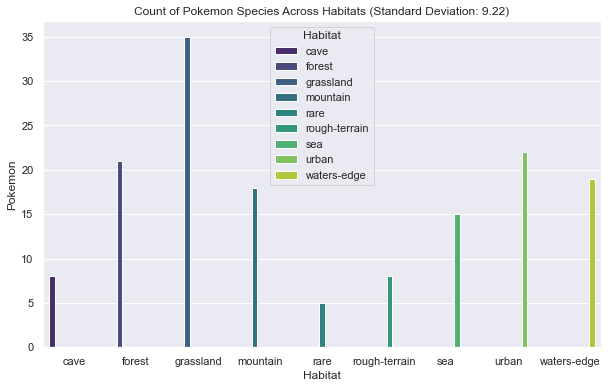

In [37]:
df = pd.read_csv("kantos-pokemon.csv")
sb.set(style="darkgrid")

# Aggregate count of Pokémon species for each habitat
habitat_counts = df.groupby('Habitat').size().reset_index(name='Count')

std_deviation = habitat_counts['Count'].std()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sb.barplot(x='Habitat', y='Count', data=habitat_counts, palette='viridis', hue='Habitat')
plt.xlabel('Habitat')
plt.ylabel('Pokemon')
plt.title(f'Count of Pokemon Species Across Habitats (Standard Deviation: {std_deviation:.2f})')


In [ ]:
df = pd.read_csv("kantos-pokemon.csv")
type_counts = df.groupby('Type_1').size().reset_index(name='Count')

std_deviation = type_counts['Count'].std()

sb.displot(y = df['Type_1'],palette='viridis', hue=df['Type_1'])
plt.title(f'Kantos Pokemon Base Type (Standard Deviation: {std_deviation:.2f})')

plt.xlabel('Pokemon')
plt.ylabel('Type')

'Attack / Health stats for Pokemon:'

'First Evolution Pokemon,  count -> 79, mean -> 1.307, std -> 0.723'

'Second Evolution Pokemon, count -> 56, mean -> 1.214, std -> 0.445'

'Third Evolution Pokemon,  count -> 16, mean -> 1.149, std -> 0.213'

TtestResult(statistic=0.8409890599010387, pvalue=0.40186352208155807, df=133.0)

TtestResult(statistic=0.8584101277017898, pvalue=0.3928730511839761, df=93.0)

TtestResult(statistic=0.5663883386519553, pvalue=0.5729413176751591, df=70.0)

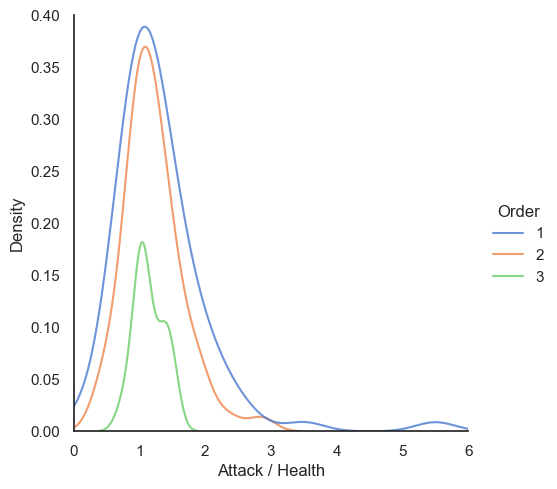

In [12]:
import requests , json
import pandas as pd
import seaborn as sns
import statistics as stat
from scipy import stats

# read in pokemon.csv as data frame for analysis 
pokemon = pd.read_csv('pokemon.csv')

# create new column 
pokemon['Attack_Ratio'] = pokemon.Attack / pokemon.Health

# create plot 
sns.set_theme(style="white")
plot = sns.displot(data=pokemon, x="Attack_Ratio", hue="Order", kind="kde", alpha=.8, palette="muted", common_norm=True).set(xlim=(0,6),ylim=(0,0.4))
plot.set(xlabel='Attack / Health', ylabel='Density')

# find mean and standard deviations for each evolution level
levels = [item for item in pokemon.Order]
ratio = [item for item in pokemon.Attack_Ratio]
ones = []
twos = []
threes = []

for i in range(len(levels)):
    if (levels[i] == 1):
        ones.append(ratio[i])
    if (levels[i] == 2):
        twos.append(ratio[i])
    if (levels[i] == 3):
        threes.append(ratio[i])

mean_ones = sum(ones) / len(ones)
mean_twos = sum(twos) / len(twos)
mean_threes = sum(threes) / len(threes)

display('Attack / Health stats for Pokemon:')
display(f'First Evolution Pokemon,  count -> {len(ones)}, mean -> {round(mean_ones, 3)}, std -> {round(stat.pstdev(ones), 3)}')
display(f'Second Evolution Pokemon, count -> {len(twos)}, mean -> {round(mean_twos, 3)}, std -> {round(stat.pstdev(twos), 3)}')
display(f'Third Evolution Pokemon,  count -> {len(threes)}, mean -> {round(mean_threes, 3)}, std -> {round(stat.pstdev(threes), 3)}')

# perform t tests 
display(stats.ttest_ind(pokemon[pokemon.Order == 1].Attack_Ratio, pokemon[pokemon.Order == 2].Attack_Ratio))
display(stats.ttest_ind(pokemon[pokemon.Order == 1].Attack_Ratio, pokemon[pokemon.Order == 3].Attack_Ratio))
display(stats.ttest_ind(pokemon[pokemon.Order == 2].Attack_Ratio, pokemon[pokemon.Order == 3].Attack_Ratio))

In [ ]:
df = pd.read_csv("pokemon.csv")

# Getting data ready for graphing data
averageStats = df.mean().iloc[1:]
averageStatMean = averageStats.mean()

# Getting data ready for plotting it in the normal distribution
scaledDf = df.copy()
scalingFactorAttack = averageStatMean / df['Attack'].mean()
scalingFactorDefense = averageStatMean / df['Defense'].mean()
scalingFactorHealth = averageStatMean / df['Health'].mean()
scalingFactorSpeed = averageStatMean / df['Speed'].mean()
scaledDf['Attack'] = df['Attack'] * scalingFactorAttack
scaledDf['Defense'] = df['Defense'] * scalingFactorDefense
scaledDf['Health'] = df['Health'] * scalingFactorHealth
scaledDf['Speed'] = df['Speed'] * scalingFactorSpeed
scaledAverageStats = scaledDf.mean().iloc[1:]

# Graphing the scaled and unscaled Pokemon data averages
averageStats.plot(kind='bar', color='skyblue')
plt.title('Average Stats of Pokemon')
plt.xlabel('Stat')
plt.ylabel('Average Value')
plt.show()
scaledAverageStats.plot(kind='bar', color='skyblue')
plt.title('Scaled Average Stats of Pokemon')
plt.xlabel('Stat')
plt.ylabel('Average Value')
plt.show()

# Get the data ready for the normal distribution graph
scaledDf['Total'] = scaledDf[['Health', 'Attack', 'Defense', 'Speed']].sum(axis=1)
meanTotal = scaledDf['Total'].mean()
stdTotal = scaledDf['Total'].std()
x = np.linspace(meanTotal - 3 * stdTotal, meanTotal + 3 * stdTotal, 1000)
y = norm.pdf(x, meanTotal, stdTotal)

# Plot the normal distribution and highlight the strongest Pokemon
plt.plot(x, y, label='Normal Distribution', color='blue')
strongestPokemon = scaledDf.loc[scaledDf['Total'].idxmax()]
plt.scatter(strongestPokemon['Total'], norm.pdf(strongestPokemon['Total'], meanTotal, stdTotal), color='red', label='Strongest Pokemon')
plt.title('Normal Distribution of Total Stats for Pokemon')
plt.xlabel('Total Stats')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

print("Information of the Strongest Overall Pokemon:")
print(strongestPokemon[['Name', 'Total']])